In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from decimal import Decimal, getcontext
import os

getcontext().prec = 50

In [2]:
# Tipos!!

angulo = Decimal
meters = Decimal

# Calibración

Primero necesitamos encontrar la calibración para cada una de las dos sesiones

In [3]:
angulo_que_maximiza_teorico: Angulo = Decimal("22.6")
angulo_que_maximiza_dia_1: Angulo = Decimal("20.8")
angulo_que_maximiza_dia_2: Angulo = Decimal("20.1")


desviacion_dia_1 = angulo_que_maximiza_teorico - angulo_que_maximiza_dia_1
desviacion_dia_2 = angulo_que_maximiza_teorico - angulo_que_maximiza_dia_2

# Actividad 1

Los maximos ocurren en:
	1.278103155999711e-07
	1.430370844579976e-07
	3.0027773267225693e-07


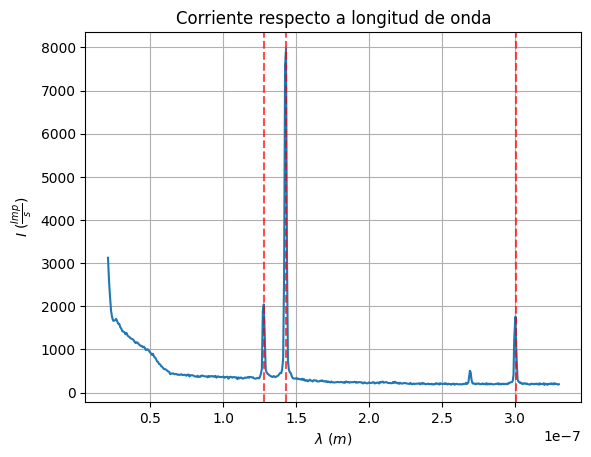

In [4]:
data_actividad_1 = pd.read_csv("./data/Actividad1-rayosX.txt")
data_actividad_1["R(35kV)/Imp/s"] = data_actividad_1["R(35kV)/Imp/s"] + float(desviacion_dia_1)

def detect_local_max(index: int, vals, threshold = 1000):
    more = vals[index + 1] if index + 1 < len(vals) else 0
    less = vals[index - 1] if index - 1 >= 0 else 0
    val = vals[index] if 0 <= index < len(vals) else 0
    return val > more and val > less and threshold < val

def convertir_a_lambda(theta, d: milimeters = Decimal(2.014e-7), m = 1):
    angulo = np.radians(theta)
    return (2 * d * Decimal(np.sin(angulo))) / m
    
data_actividad_1["lambda/m"] = [float(convertir_a_lambda(val)) for val in data_actividad_1["theta/Grads"]]

local_maxs = [i for i, _ in enumerate(data_actividad_1["R(35kV)/Imp/s"]) if detect_local_max(i, data_actividad_1["R(35kV)/Imp/s"]) and i > 100]
print(f"Los maximos ocurren en:")
for lmax in local_maxs:
    print(f"\t{data_actividad_1["lambda/m"][lmax]}")

plt.plot(data_actividad_1["lambda/m"], data_actividad_1["R(35kV)/Imp/s"])

for idx in local_maxs:
    if idx < len(data_actividad_1):  # Verificar que el índice sea válido
        x_val = data_actividad_1["lambda/m"].iloc[idx]
        plt.axvline(x=x_val, color='red', linestyle='--', alpha=0.7, 
                   label='Máximo local' if idx == local_maxs[0] else "")

plt.title("Corriente respecto a longitud de onda")
plt.xlabel(r"$\lambda$ ($m$)")
plt.ylabel(r"$I$ ($\frac{Imp}{s}$)")
plt.grid()

# Actividad 2

In [5]:
# DATA
data_actividad_2 = pd.read_csv("./data/Actividad_2.txt")

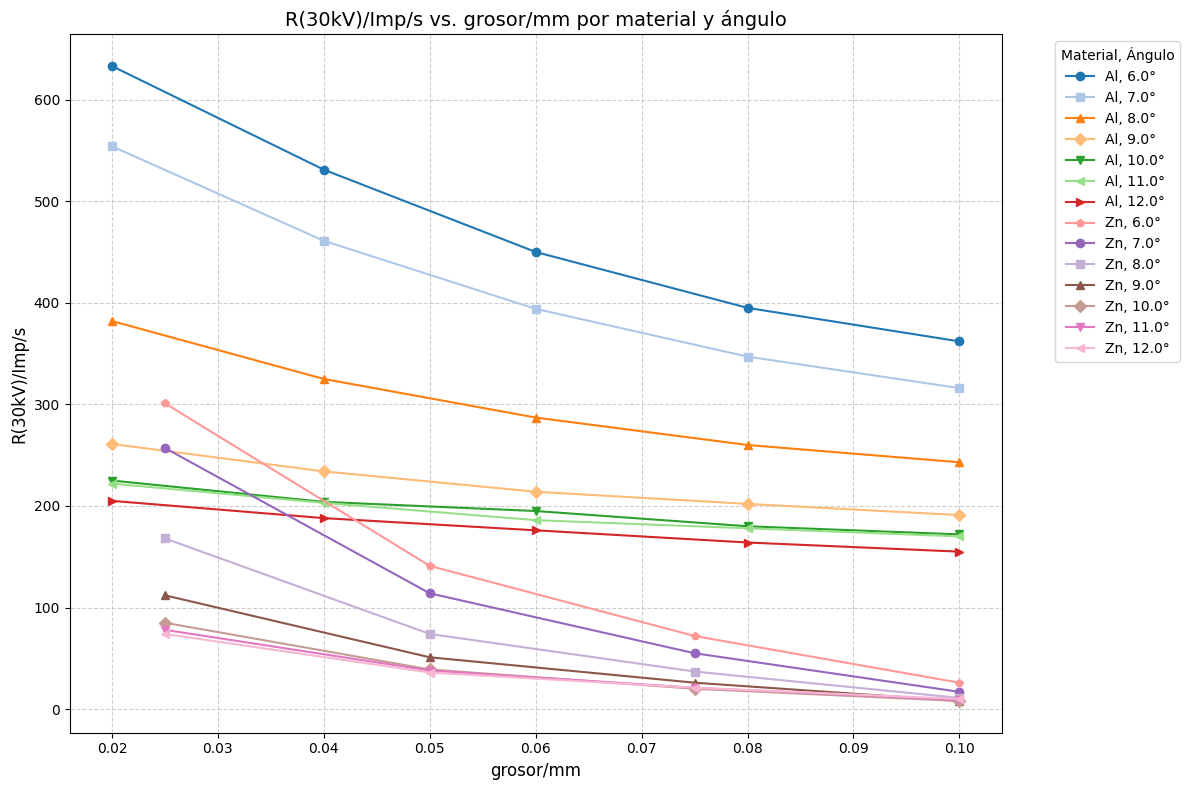

In [6]:
grouped = data_actividad_2.groupby(['material', 'theta/Grads'])
plt.figure(figsize=(12, 8))

# Colores y marcadores para diferenciar líneas (opcional)
colors = plt.cm.tab20.colors
markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p']

# Iterar sobre cada grupo para trazar una línea
for i, (name, group) in enumerate(grouped):
    material, theta = name
    # Ordenar por grosor para asegurar que la línea se trace en orden
    group = group.sort_values('grosor/mm')
    # Seleccionar color y marcador cíclicamente
    color = colors[i % len(colors)]
    marker = markers[i % len(markers)]
    plt.plot(group['grosor/mm'], group['R(30kV)/Imp/s'], 
             marker=marker, linestyle='-', color=color, 
             label=f'{material}, {theta}°')

# Personalizar el gráfico
plt.xlabel('grosor/mm', fontsize=12)
plt.ylabel('R(30kV)/Imp/s', fontsize=12)
plt.title('R(30kV)/Imp/s vs. grosor/mm por material y ángulo', fontsize=14)
plt.legend(title='Material, Ángulo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Mostrar el gráfico
plt.show()